<a href="https://colab.research.google.com/github/Stevox2014/pythoncode/blob/main/Stephen_Ayanwola_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Members
## Stephen Ayanwola
## Girish Gampa
## Amol Gaikwad

**Insralling al the required pacakges**

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

## Getting the directory and checking if the data dirctory was properly loaded if all labels are proprly entered


In [ ]:
import os
data_dir='/content/drive/MyDrive/Colab Notebooks/data'
os.listdir(data_dir)

['Apple Red Delicious',
 'Apple Red Yellow 2',
 'Apple Golden 2',
 'Apple Granny Smith',
 'Apple Red 1',
 'Apple Braeburn',
 'Apple Golden 1',
 'Apple Pink Lady',
 'Apple Crimson Snow',
 'Apple Red Yellow 1']

## Loading the data set using tensorflow keras

In [ ]:
tf.data.Dataset?

In [ ]:
### since we have 3100 images i made the batch size 31 to get 100 batches be able to train validate and test our images, the image size is 256,256, labelnames would also be retuned as one hot encoded
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data', batch_size=31, image_size =(32,32), label_mode= 'categorical')

Found 3100 files belonging to 10 classes.


In [ ]:
tf.keras.utils.image_dataset_from_directory?

In [ ]:
di = data.as_numpy_iterator()

In [ ]:
batch=di.next()

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

255.0

In [ ]:
batch[1].min()

0.0

## Data Preprocessing / Data augumentation

Scaling( since the maximum value of our image array is 255 we are going to be dividing by 255 to make all our values between 0 to 1)

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
di = data.as_numpy_iterator()

In [ ]:
batch = di.next()

In [ ]:
batch[0].max()

1.0

In [ ]:
batch[1].max()

1.0

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


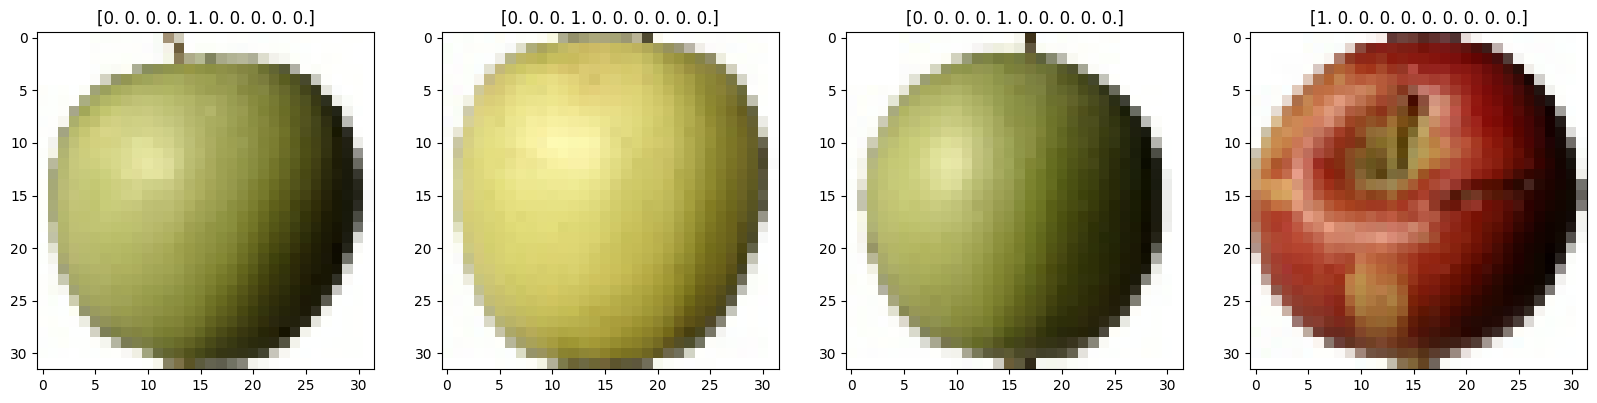

In [ ]:



fig, ax = plt.subplots(ncols= 4, figsize= (20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

100

##Spliting our data to Train Test Validation Split in order to avoid over fitting of our model

In [ ]:
train_size= int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size= int(len(data)*0.1)

In [ ]:
test_size+val_size+train_size### the total batch size

100

In [ ]:
train= data.take(train_size)
val= data.skip(train_size).take(val_size)
test =data.skip(train_size+val_size).take (test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout


Building model with diffrent layers

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

##Compling the CNN Model

In [ ]:

### Compile CNN

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##Training the model and shuffling the model to avoid over fitting

In [ ]:
## adding the shuffle to prevent overfitting
batch_size= 31
epochs = 20
history = model.fit(train, validation_data=val, batch_size=batch_size,shuffle=True, epochs= epochs)

Epoch 1/20
70/70 [==============================] - 541s 8s/step - loss: 0.8621 - accuracy: 0.6535 - val_loss: 0.2150 - val_accuracy: 0.9339
Epoch 2/20
70/70 [==============================] - 8s 107ms/step - loss: 0.1751 - accuracy: 0.9475 - val_loss: 0.0670 - val_accuracy: 0.9839
Epoch 3/20
70/70 [==============================] - 8s 109ms/step - loss: 0.0592 - accuracy: 0.9839 - val_loss: 0.0418 - val_accuracy: 0.9871
Epoch 4/20
70/70 [==============================] - 9s 120ms/step - loss: 0.0252 - accuracy: 0.9931 - val_loss: 0.0202 - val_accuracy: 0.9935
Epoch 5/20
70/70 [==============================] - 6s 79ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 6/20
70/70 [==============================] - 6s 80ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 7/20
70/70 [==============================] - 5s 71ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 8/20

Plotting The accuracy and loss over each epoch

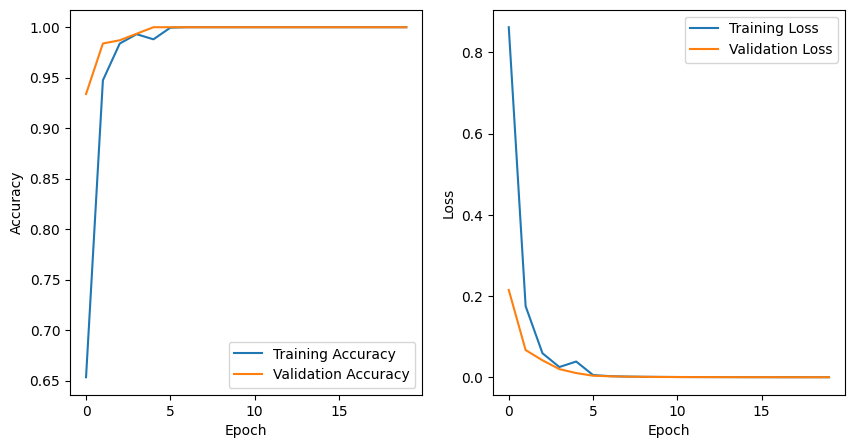

In [ ]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

##Model evaluation

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, binary_accuracy

In [ ]:
pre= Precision()
re = Recall()

In [ ]:
for batch in  test.as_numpy_iterator():
  x,y = batch
  yhat =model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)


1/1 [==============================] - 0s 34ms/step


In [ ]:
print( f'Precison: {pre.result()}, Recall: {re.result()}')

Precison: 1.0, Recall: 1.0
